In [1]:
!tar -xvf ../input/private-celeb/Merged.tgz

._Merged
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/
Merged/._45-50
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/45-50/
Merged/._30-35
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/30-35/
Merged/._35-40
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/35-40/
Merged/._50-55
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/50-55/
Merged/._25-30
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/25-30/
Merged/25-30/._63.jpg
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/25-30/63.jpg
Merged/25-30/._77.jpg
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
Merged/25-30/77.jpg
Merged/25-30/._76.jpg
tar: Ignoring unknown extended header keywor

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import cv2
import matplotlib.image as mpimg
import warnings
import os
import sklearn
import tensorflow as tf
import imblearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [3]:
imgPath = [] # İmage path leri içine almak için boş liste

In [4]:
path = "Merged"
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.startswith("._"):
            continue
        imgPath.append(os.path.join(dirname, filename)) # The paths read from the file are thrown into the created empty list.
imgPath = np.asarray(sorted(imgPath)) # sort to make sure data deterministic
print(imgPath.shape, type(imgPath))

(375,) <class 'numpy.ndarray'>


In [5]:
# The shape of the imgPath array is assigned to a variable named imgShape in order to use it in loops.
imgShape = imgPath.shape[0]
print("imgShape: ",imgShape, type(imgShape))

imgShape:  375 <class 'int'>


In [6]:
# Shuffle but make sure deterministic
np.random.seed(42)
np.random.shuffle(imgPath)

In [7]:
def loopsAndframe(imgShape,imgPath):
    
    # Empyt lists
    whatkindofimage = []                     
    imgName = []     
    Age =[]
    paths=[]

    # For loop
    for i in range(0,imgShape):
        a = path.split("/")[0]       # We dynamically determine whether the test image or the train image.

        b = imgPath[i].split("/")[-1]  # The names of the images were determined from the path using the split method.
        if b.startswith("._"):
            continue
        whatkindofimage.append(a)
        imgName.append(b) 

        c = imgPath[i].split("/")[-2] # The ages of the images were determined.
        Age.append(c)
        paths.append(imgPath[i])
    
    # Create data frame
    c1 = pd.Series(whatkindofimage)
    c2 = pd.Series(imgName)
    c3 = pd.Series(Age)
    c4 = pd.Series(paths)

    data_ = dict(whatkindofimage = c1,imgName = c2,Age = c3, imgPath = c4) # The created columns are added to the dataframe.
    df = pd.DataFrame(data_)
    return df
print("image kind:", loopsAndframe(imgShape,imgPath).whatkindofimage[0])
print("image name:", loopsAndframe(imgShape,imgPath).imgName[0])
print("age:", loopsAndframe(imgShape,imgPath).Age[0])
print("image path:", loopsAndframe(imgShape,imgPath).imgPath[0])

image kind: Merged
image name: 49.jpg
age: 30-35
image path: Merged/30-35/49.jpg


In [8]:
loopsAndframe(imgShape,imgPath).head()

,whatkindofimage,imgName,Age,imgPath
0,Merged,49.jpg,30-35,Merged/30-35/49.jpg
1,Merged,39.jpg,25-30,Merged/25-30/39.jpg
2,Merged,22.jpg,25-30,Merged/25-30/22.jpg
3,Merged,90.jpg,35-40,Merged/35-40/90.jpg
4,Merged,60.jpg,25-30,Merged/25-30/60.jpg


In [9]:
def imreading(images_index):    #  To read the images with the imread method, a method has been developed to get the index of the path in the name of imread,
    x = imgPath[images_index]   #  and read the photo in the desired index in array format.
    y = plt.imread(x)
    return y

In [10]:
def imshowing(index):                # Developed a method called imshowing to read images.
    x = imgPath[index]               # With determined index, the photo in the desired order in the path can be visualized.
    y = f"Age = {loopsAndframe(imgShape,imgPath).Age[index]}" # the age in the photograph was written to x axis.
    z = (loopsAndframe(imgShape,imgPath).whatkindofimage[0],loopsAndframe(imgShape,imgPath).imgName[index])               
    k = mpimg.imread(x) 
    plt.imshow(k)  
    plt.title(z)                     # The name of the visualized photo is printed in the title section.
    #plt.axis("off")
    plt.xlabel(y)
    plt.show()

In [11]:
# empty lists for arrays
model_img1 = []
model_img = []
model_age = []
from tqdm import tqdm

result = np.empty((len(imgPath, )))

for i in tqdm(range(0,len(imgPath))):                       # The interval should be determined with how many images will be trained.                      
    a = imgPath[i]
    model_img1.append(a)                    # Creating images and labels with loop
    b = cv2.imread(model_img1[i])
    b = cv2.resize(b, (128, 128))
    model_img.append(b)
    
    c = loopsAndframe(imgShape,imgPath)["Age"][i]
    d = cv2.imread(model_img1[i])
    model_age.append(c)
    
print("model_img",type(model_img[0]))
print("model_age",type(model_age[0]))

100%|██████████| 375/375 [00:02<00:00, 163.01it/s]

model_img <class 'numpy.ndarray'>
model_age <class 'str'>


In [12]:
model_img = np.asarray(model_img)
print("model image shape: ", model_img.shape)

model image shape:  (375, 128, 128, 3)


In [13]:
X = np.asarray(model_img)
print(X.shape,type(X))
X = X.reshape(-1,128,128,3).astype("float") # for sure true shape
print(X.shape,type(X))

(375, 128, 128, 3) <class 'numpy.ndarray'>
(375, 128, 128, 3) <class 'numpy.ndarray'>


In [14]:
Y = np.asarray(model_age).reshape(-1,1) #setting label entries for model
print(Y.shape, type(Y))

(375, 1) <class 'numpy.ndarray'>


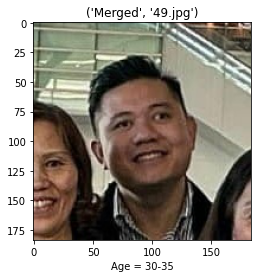

In [15]:
imshowing(0)

In [16]:
# normalization
X = X / 255.0

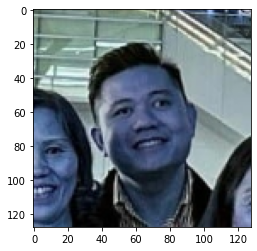

In [17]:
plt.imshow(X[0]) # view of the same image after normalization
plt.show()

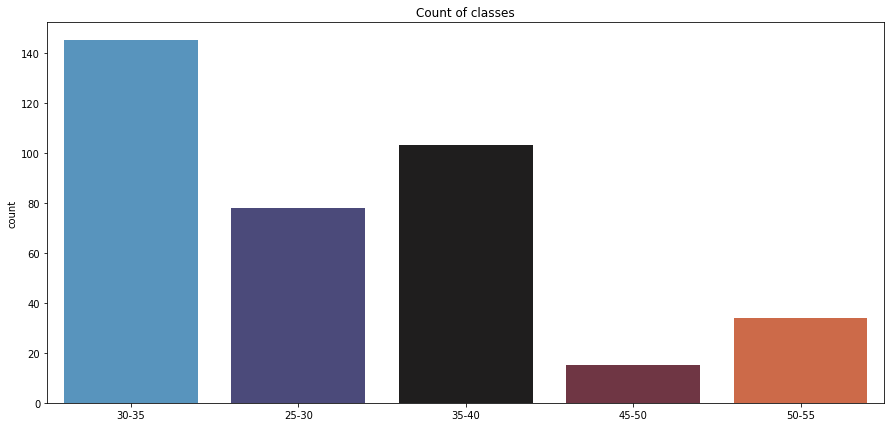

In [18]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(model_age, palette="icefire")
plt.title("Count of classes")
plt.show()

In [19]:
# Upsampling
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_idx = np.arange(X.shape[0]).reshape(-1, 1)
# X_idx, Y = ros.fit_resample(X_idx, Y)
# X_resampled = X[X_idx.flatten()]
# print(X.shape, Y.shape)

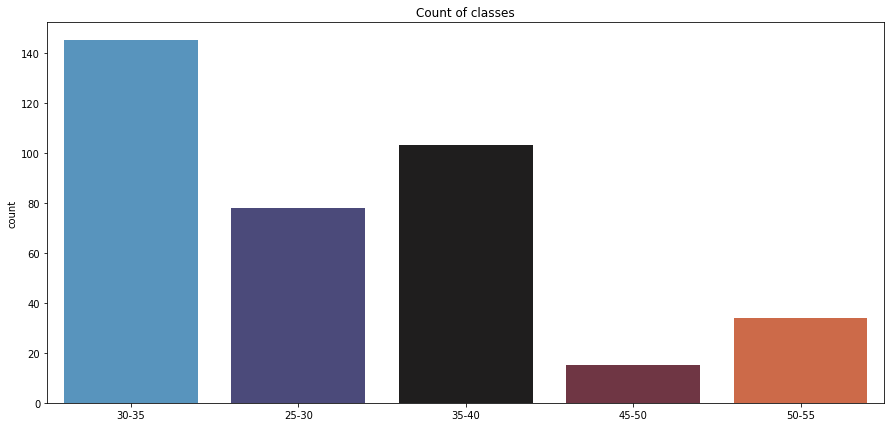

In [20]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(Y.flatten(), palette="icefire")
plt.title("Count of classes")
plt.show()

In [21]:
from keras.utils.np_utils import to_categorical
Y[Y == '25-30'] = 0
Y[Y == '30-35'] = 1
Y[Y == '35-40'] = 2
Y[Y == '40-45'] = 3
Y[Y == '45-50'] = 4
Y[Y == '50-55'] = 5
# convert to one-hot-encoding
Y = to_categorical(Y)
Y

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X, Y, test_size = 0.20,random_state = 42)
print("X_train.shape",X_train.shape,type(X_train))
print("X_val.shape",X_val.shape,type(X_val))
print("Y_train.shape",Y_train.shape,type(Y_train))
print("Y_val.shape",Y_val.shape,type(Y_val))

X_train.shape (300, 128, 128, 3) <class 'numpy.ndarray'>
X_val.shape (75, 128, 128, 3) <class 'numpy.ndarray'>
Y_train.shape (300, 6) <class 'numpy.ndarray'>
Y_val.shape (75, 6) <class 'numpy.ndarray'>


In [23]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,ZeroPadding2D,Activation
from keras.optimizers import RMSprop,Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input

In [24]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
model = Sequential()

# 1st layer as the lumpsum weights from vggnet19
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(VGG19(include_top = False, pooling = "max", weights = "imagenet"))
model.add(Flatten())
model.add(Dropout(0.2))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(4096, activation = "relu"))
model.add(Dense(4096, activation = "relu"))
model.add(Dense(6, activation = "softmax"))

# Say not to train first layer (VGGNet) model as it is already trained
model.layers[0].trainable = False

80142336/80134624 [==============================] - 0s 0us/step


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4096)              2101248   
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 24582     
Total params: 38,931,526
Trainable params: 18,907,142
Non-trainable params: 20,024,384
___________________________________

In [26]:
adam = Adam(lr = 1e-3,beta_1 = 0.9, beta_2 = 0.999)

In [27]:
# Compile the Model
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])
# loss = "categorical_crossentropy" - "binary_crossentropy"  - "sparse_categorical_crossentropy"

# Epochs and Batch Size
epochs = 50 # for better result increase the epochs
batch_size = 100

In [28]:
# fit the model
history = model.fit(
    X_train, Y_train, epochs = epochs, 
    validation_data = (X_val,Y_val),
    steps_per_epoch = X_train.shape[0]// batch_size,
)

Epoch 1/50
3/3 [==============================] - 57s 10s/step - loss: 5.8257 - accuracy: 0.1708 - val_loss: 4.3929 - val_accuracy: 0.2400
Epoch 2/50
3/3 [==============================] - 12s 5s/step - loss: 4.2934 - accuracy: 0.2158 - val_loss: 1.6992 - val_accuracy: 0.2933
Epoch 3/50
3/3 [==============================] - 13s 5s/step - loss: 1.5474 - accuracy: 0.4037 - val_loss: 1.5947 - val_accuracy: 0.3200
Epoch 4/50
3/3 [==============================] - 13s 5s/step - loss: 1.5262 - accuracy: 0.4129 - val_loss: 1.4925 - val_accuracy: 0.4133
Epoch 5/50
3/3 [==============================] - 13s 5s/step - loss: 1.4079 - accuracy: 0.4854 - val_loss: 1.4748 - val_accuracy: 0.2933
Epoch 6/50
3/3 [==============================] - 13s 5s/step - loss: 1.3201 - accuracy: 0.4225 - val_loss: 1.3173 - val_accuracy: 0.4533
Epoch 7/50
3/3 [==============================] - 13s 5s/step - loss: 1.2705 - accuracy: 0.4817 - val_loss: 1.3233 - val_accuracy: 0.4400
Epoch 8/50
3/3 [=================

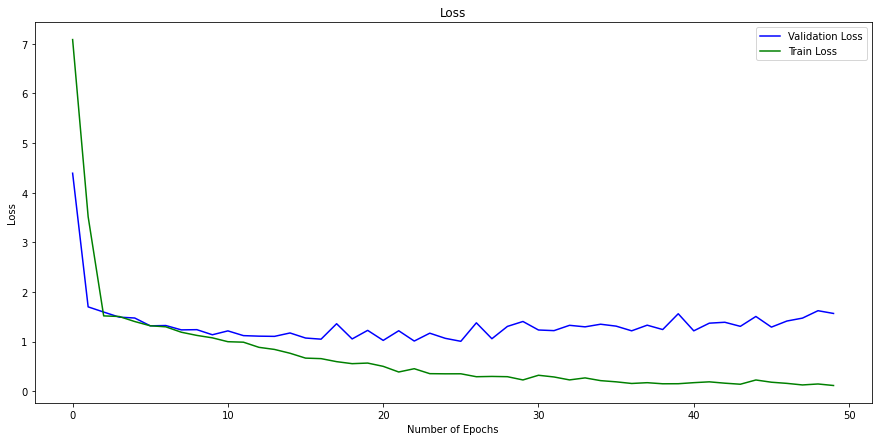

In [29]:
# Plot the loss curves for train and validation 
plt.figure(figsize=(15,7))
plt.plot(history.history['val_loss'], color='b', label="Validation Loss")
plt.plot(history.history['loss'], color='g', label="Train Loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

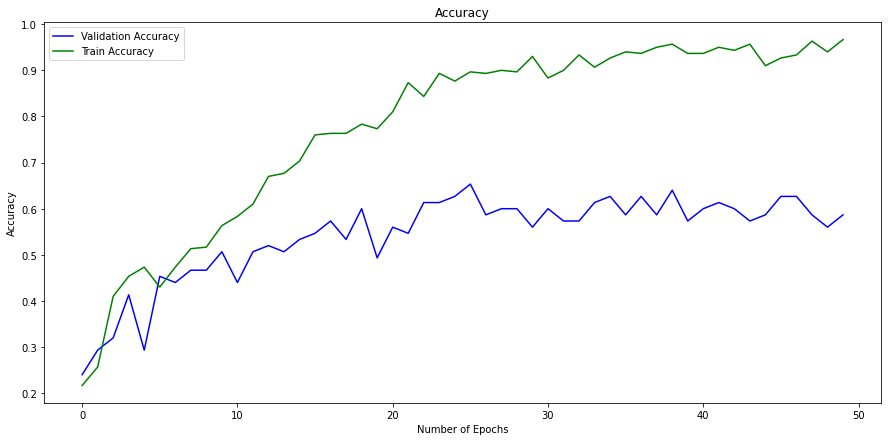

In [30]:
# Plot the accuracy curves for train and validation
plt.figure(figsize=(15,7))
plt.plot(history.history['val_accuracy'], color='b', label="Validation Accuracy")
plt.plot(history.history['accuracy'], color='g', label="Train Accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
Y_val.sum(axis=0)

array([18., 22., 27.,  0.,  2.,  6.], dtype=float32)

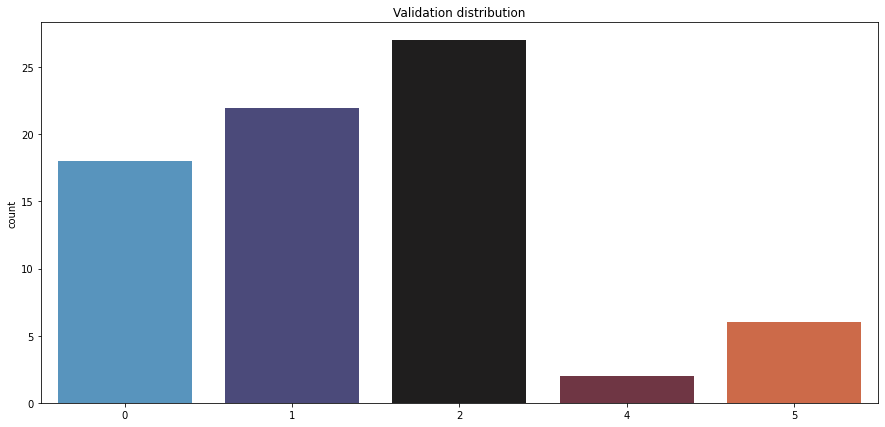

In [32]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(np.argmax(Y_val, axis=1), palette="icefire")
plt.title("Validation distribution")
plt.show()

In [33]:
val_count = Y_val.sum(axis=0)
train_count = Y_train.sum(axis=0)

In [34]:
train_base = train_count.max() / train_count.sum()
val_base = val_count.max() / val_count.sum()
print("Train Baseline: ", train_base)
print("Validation Baseline: ", val_base)

Train Baseline:  0.41
Validation Baseline:  0.36


In [35]:
train_acc = model.evaluate(X_train, Y_train)[1]
val_acc = model.evaluate(X_val, Y_val)[1]
print("Train accuracy: ", train_acc)
print("Validation accuracy: ", val_acc)

3/3 [==============================] - 3s 770ms/step - loss: 1.6870 - accuracy: 0.4533
Train accuracy:  0.9700000286102295
Validation accuracy:  0.4533333480358124


In [36]:
print("Train improved: ", train_acc - train_base)
print("Validation improved: ", val_acc - val_base)

Train improved:  0.5600000321865082
Validation improved:  0.09333333373069763


In [37]:
model.predict_classes(X_val)

array([2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 4, 1, 1, 5, 1, 1, 1, 1, 0, 4, 0, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 0, 1, 2, 4, 1, 2, 1])

In [38]:
np.argmax(Y_val, axis=1)

array([2, 5, 2, 0, 0, 5, 0, 1, 1, 2, 0, 1, 1, 5, 1, 1, 1, 0, 0, 4, 1, 2,
       5, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1,
       2, 0, 2, 1, 2, 1, 2, 2, 0, 5, 2, 0, 2, 2, 1, 1, 0, 2, 5, 1, 2, 2,
       2, 1, 0, 0, 2, 4, 2, 2, 0])

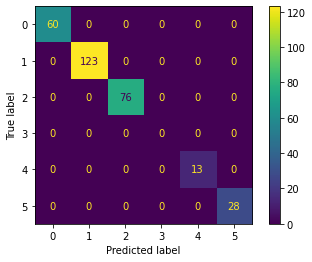

In [39]:
ConfusionMatrixDisplay(confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(model.predict(X_train),axis=1), labels=[0,1,2,3,4,5])).plot()

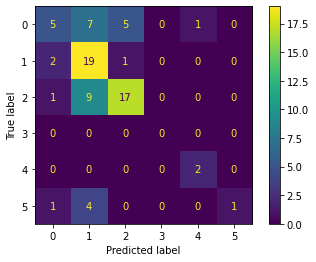

In [40]:
ConfusionMatrixDisplay(confusion_matrix(np.argmax(Y_val, axis=1), np.argmax(model.predict(X_val),axis=1), labels=[0,1,2,3,4,5])).plot()

In [41]:
model.save("vggnet_final.keras")